## Project Title: Predicting House Prices Using Exploratory Data Analysis and Regression Modeling

# PART 1: Data Loading & Understanding

In [105]:
# 1. import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
import pandas as pd


# a. Data importing

In [149]:
# 2. Load the Dataset

project = pd.read_csv("AmesHousing.csv")  

In [150]:
# i. Display first  5 rows
project.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [151]:
# ii.Dataset shape

project.shape  # shows the number of rows and column

(2930, 82)

In [152]:
# iii.Column names

project.columns  #displays the names of all 82 columns heads

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [153]:
# iv.Data types

project.dtypes #shows the types of adta in your data set

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [154]:
# v.Summary statistics 
# a. count

project.count()  # code to display number of data in rows, i can notice that the colum with lot frontage has some missing data 490 

Order             2930
PID               2930
MS SubClass       2930
MS Zoning         2930
Lot Frontage      2440
                  ... 
Mo Sold           2930
Yr Sold           2930
Sale Type         2930
Sale Condition    2930
SalePrice         2930
Length: 82, dtype: int64

In [155]:
# b. Average

project.mean(numeric_only=True) #code that gives the mean of all columns that have numerical values

Order              1.465500e+03
PID                7.144645e+08
MS SubClass        5.738737e+01
Lot Frontage       6.922459e+01
Lot Area           1.014792e+04
Overall Qual       6.094881e+00
Overall Cond       5.563140e+00
Year Built         1.971356e+03
Year Remod/Add     1.984267e+03
Mas Vnr Area       1.018968e+02
BsmtFin SF 1       4.426296e+02
BsmtFin SF 2       4.972243e+01
Bsmt Unf SF        5.592625e+02
Total Bsmt SF      1.051615e+03
1st Flr SF         1.159558e+03
2nd Flr SF         3.354560e+02
Low Qual Fin SF    4.676792e+00
Gr Liv Area        1.499690e+03
Bsmt Full Bath     4.313525e-01
Bsmt Half Bath     6.113388e-02
Full Bath          1.566553e+00
Half Bath          3.795222e-01
Bedroom AbvGr      2.854266e+00
Kitchen AbvGr      1.044369e+00
TotRms AbvGrd      6.443003e+00
Fireplaces         5.993174e-01
Garage Yr Blt      1.978132e+03
Garage Cars        1.766815e+00
Garage Area        4.728197e+02
Wood Deck SF       9.375188e+01
Open Porch SF      4.753345e+01
Enclosed

In [ ]:
# c. Median


In [156]:
# d. min # code to show minimum value in each row that contains numerical data

project.min(numeric_only=True)

Order                      1.0
PID                526301100.0
MS SubClass               20.0
Lot Frontage              21.0
Lot Area                1300.0
Overall Qual               1.0
Overall Cond               1.0
Year Built              1872.0
Year Remod/Add          1950.0
Mas Vnr Area               0.0
BsmtFin SF 1               0.0
BsmtFin SF 2               0.0
Bsmt Unf SF                0.0
Total Bsmt SF              0.0
1st Flr SF               334.0
2nd Flr SF                 0.0
Low Qual Fin SF            0.0
Gr Liv Area              334.0
Bsmt Full Bath             0.0
Bsmt Half Bath             0.0
Full Bath                  0.0
Half Bath                  0.0
Bedroom AbvGr              0.0
Kitchen AbvGr              0.0
TotRms AbvGrd              2.0
Fireplaces                 0.0
Garage Yr Blt           1895.0
Garage Cars                0.0
Garage Area                0.0
Wood Deck SF               0.0
Open Porch SF              0.0
Enclosed Porch             0.0
3Ssn Por

In [157]:
# d. max # code to show maximum value in each row that contains numerical data

project.max(numeric_only=True)

Order              2.930000e+03
PID                1.007100e+09
MS SubClass        1.900000e+02
Lot Frontage       3.130000e+02
Lot Area           2.152450e+05
Overall Qual       1.000000e+01
Overall Cond       9.000000e+00
Year Built         2.010000e+03
Year Remod/Add     2.010000e+03
Mas Vnr Area       1.600000e+03
BsmtFin SF 1       5.644000e+03
BsmtFin SF 2       1.526000e+03
Bsmt Unf SF        2.336000e+03
Total Bsmt SF      6.110000e+03
1st Flr SF         5.095000e+03
2nd Flr SF         2.065000e+03
Low Qual Fin SF    1.064000e+03
Gr Liv Area        5.642000e+03
Bsmt Full Bath     3.000000e+00
Bsmt Half Bath     2.000000e+00
Full Bath          4.000000e+00
Half Bath          2.000000e+00
Bedroom AbvGr      8.000000e+00
Kitchen AbvGr      3.000000e+00
TotRms AbvGrd      1.500000e+01
Fireplaces         4.000000e+00
Garage Yr Blt      2.207000e+03
Garage Cars        5.000000e+00
Garage Area        1.488000e+03
Wood Deck SF       1.424000e+03
Open Porch SF      7.420000e+02
Enclosed

In [158]:
# e. Standard Variation # this code gives the standard  variation on each colunm with numerical values

project.std(numeric_only=True)

Order              8.459625e+02
PID                1.887308e+08
MS SubClass        4.263802e+01
Lot Frontage       2.336533e+01
Lot Area           7.880018e+03
Overall Qual       1.411026e+00
Overall Cond       1.111537e+00
Year Built         3.024536e+01
Year Remod/Add     2.086029e+01
Mas Vnr Area       1.791126e+02
BsmtFin SF 1       4.555908e+02
BsmtFin SF 2       1.691685e+02
Bsmt Unf SF        4.394942e+02
Total Bsmt SF      4.406151e+02
1st Flr SF         3.918909e+02
2nd Flr SF         4.283957e+02
Low Qual Fin SF    4.631051e+01
Gr Liv Area        5.055089e+02
Bsmt Full Bath     5.248202e-01
Bsmt Half Bath     2.452536e-01
Full Bath          5.529406e-01
Half Bath          5.026293e-01
Bedroom AbvGr      8.277311e-01
Kitchen AbvGr      2.140762e-01
TotRms AbvGrd      1.572964e+00
Fireplaces         6.479209e-01
Garage Yr Blt      2.552841e+01
Garage Cars        7.605664e-01
Garage Area        2.150465e+02
Wood Deck SF       1.263616e+02
Open Porch SF      6.748340e+01
Enclosed

In [159]:
# f. quartile ranges 

IQR = Q3 - Q1
print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 84000.0


In [160]:
# 4.Identify:i.	Numerical variables 

numerical_cols=project.select_dtypes(include=['int64', 'float64'])  #code to disply columns that have numrical data
print (numerical_cols.columns)

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')


In [161]:
# 4.Identify :ii.Categorical variables

cat_cols = project.select_dtypes(exclude='number').columns  #code to disply columns that lack numrical data
print(cat_cols)

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


# Part 2: Cleaning and preprocessing 

In [162]:
# 1a.Check for missing values.

project.isnull().values.any()  #Returns True if any missing values exist

np.True_

In [163]:
# 1b. Number of missing values in each column

project.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [164]:
#1c. Number of missing values as a percentage 

missing_percent = project.isnull().sum() / len(project) * 100
print(missing_percent)

Order              0.000000
PID                0.000000
MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 82, dtype: float64


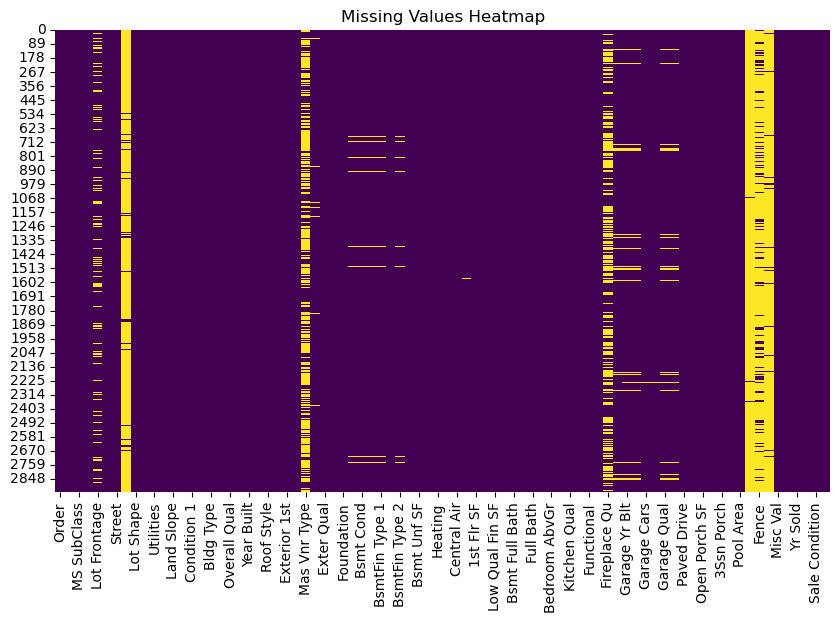

In [165]:
# 1d. Heatmap of missing values

plt.figure(figsize=(10,6))
sns.heatmap(project.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [166]:
# 2a.Handle missing values (drop or impute).

project_clean = project.dropna()
print (project_clean)

Empty DataFrame
Columns: [Order, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val

In [167]:
# 2b .Handle missing values 
project_clean = project.dropna(axis=1) # 
print (project_clean)

      Order        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
0         1  526301100           20        RL     31770   Pave       IR1   
1         2  526350040           20        RH     11622   Pave       Reg   
2         3  526351010           20        RL     14267   Pave       IR1   
3         4  526353030           20        RL     11160   Pave       Reg   
4         5  527105010           60        RL     13830   Pave       IR1   
...     ...        ...          ...       ...       ...    ...       ...   
2925   2926  923275080           80        RL      7937   Pave       IR1   
2926   2927  923276100           20        RL      8885   Pave       IR1   
2927   2928  923400125           85        RL     10441   Pave       Reg   
2928   2929  924100070           20        RL     10010   Pave       Reg   
2929   2930  924151050           60        RL      9627   Pave       Reg   

     Land Contour Utilities Lot Config  ... Enclosed Porch 3Ssn Porch  \
0             

In [169]:
# 3.Check for duplicates.

project.duplicated().any() #no dulpicates found

np.False_

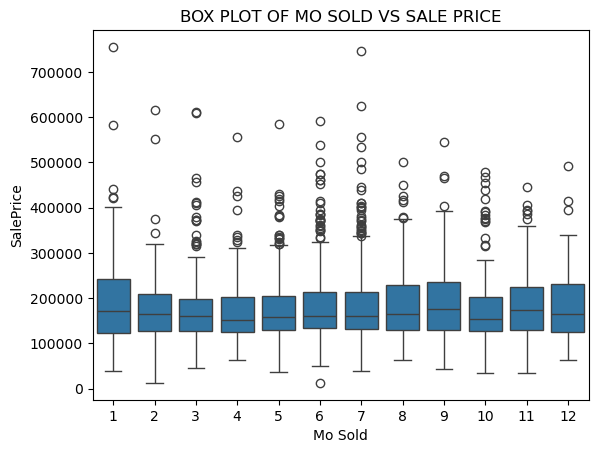

In [123]:
# 4.	Detect outliers using:a)Boxplots  

#plt.figure(figsize=(5,6))
sns.boxplot(data=project, x='Mo Sold', y='SalePrice')
plt.title("BOX PLOT OF MO SOLD VS SALE PRICE")
plt.xlabel("Mo Sold")
plt.ylabel("SalePrice")
plt.show()

#outliers present

In [124]:
# 4.Detect outliers using: b)IQR method

col = 'SalePrice'

# Step 1: Compute Q1, Q3, and IQR
Q1 = project[col].quantile(0.25)
Q3 = project[col].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Compute lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Find outliers
outliers = project[(project[col] < lower_bound) | (project[col] > upper_bound)]
print("Outliers in", col)
print(outliers)

Outliers in SalePrice
      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
15       16  527216070           60        RL          47.0     53504   Pave   
17       18  527258010           20        RL          88.0     11394   Pave   
36       37  528108120           60        RL         102.0     12858   Pave   
38       39  528120060           20        RL          83.0     10159   Pave   
44       45  528150070           20        RL         100.0     12919   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2666   2667  902400110           75        RM          90.0     22950   Pave   
2737   2738  905427030           75        RL          60.0     19800   Pave   
2883   2884  911370430          120        RM          41.0      5748   Pave   
2901   2902  921205030           20        RL          88.0     11443   Pave   
2902   2903  921205050           20        RL          88.0     11577   Pave   

     Alley Lot Sh

In [127]:
# 5.Subset the dataset to select important variables:

# Select important variables
important_columns = ['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Garage Area', 'Total Bsmt SF', 'Year Built']
project_subset = project[important_columns]

# View the first few rows
print(project_subset.head())

   SalePrice  Gr Liv Area  Overall Qual  Garage Area  Total Bsmt SF  \
0     215000         1656             6        528.0         1080.0   
1     105000          896             5        730.0          882.0   
2     172000         1329             6        312.0         1329.0   
3     244000         2110             7        522.0         2110.0   
4     189900         1629             5        482.0          928.0   

   Year Built  
0        1960  
1        1961  
2        1958  
3        1968  
4        1997  


# PART 3: Exploratory Data Analysis

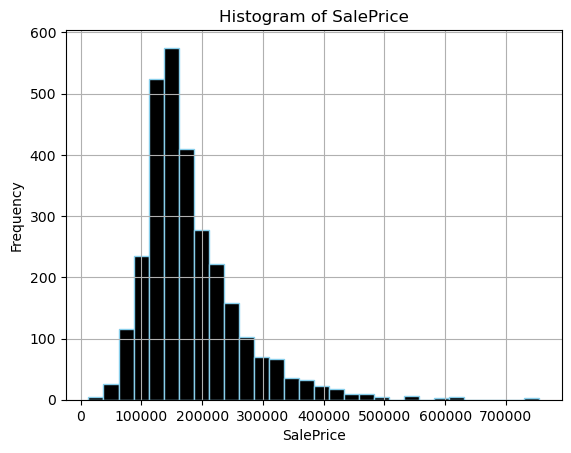

In [128]:
# PART 3: Exploratory Data Analysis
# a) plot of Histogram of SalePrice

plt.hist(project['SalePrice'], bins=30, color='black', edgecolor='skyblue')
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

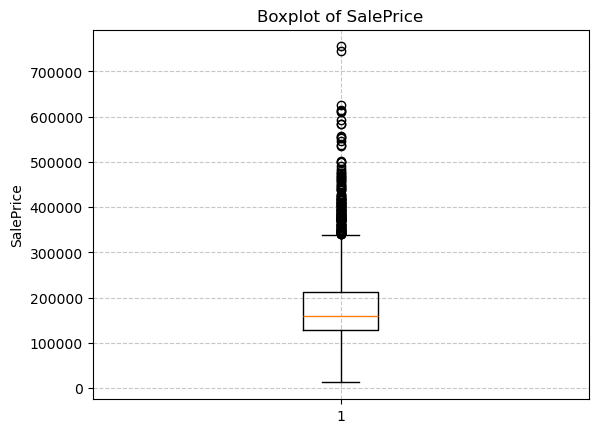

In [129]:
#b) Boxplot of SalePrice

# Boxplot for SalePrice
plt.boxplot(project['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.ylabel('SalePrice')
plt.grid(True, linestyle='--', alpha=0.7)  # optional grid
plt.show()

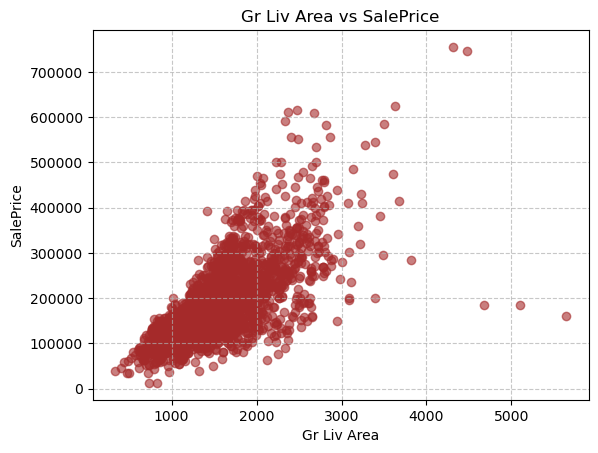

In [130]:
# c) Scatterplot: GrLivArea vs SalePrice

plt.scatter(project['Gr Liv Area'], project['SalePrice'], color='brown', alpha=0.6)

plt.title('Gr Liv Area vs SalePrice')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.grid(True, linestyle='--', alpha=0.7)  # optional grid
plt.show()

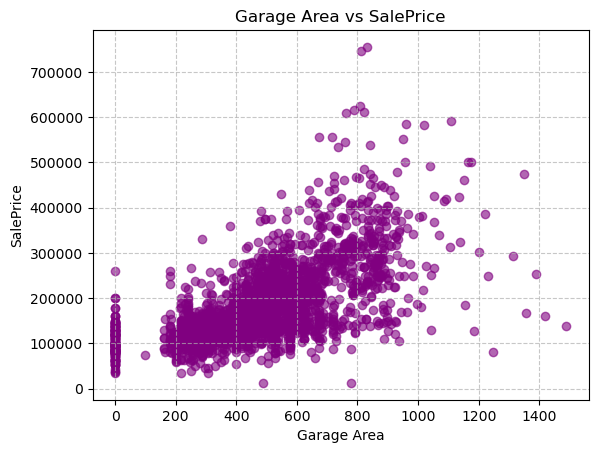

In [131]:
#d) Scatterplot: GarageArea vs SalePrice

plt.scatter(project['Garage Area'], project['SalePrice'], color='purple', alpha=0.6)

plt.title('Garage Area vs SalePrice')
plt.xlabel('Garage Area')
plt.ylabel('SalePrice')
plt.grid(True, linestyle='--', alpha=0.7)  # optional grid
plt.show()

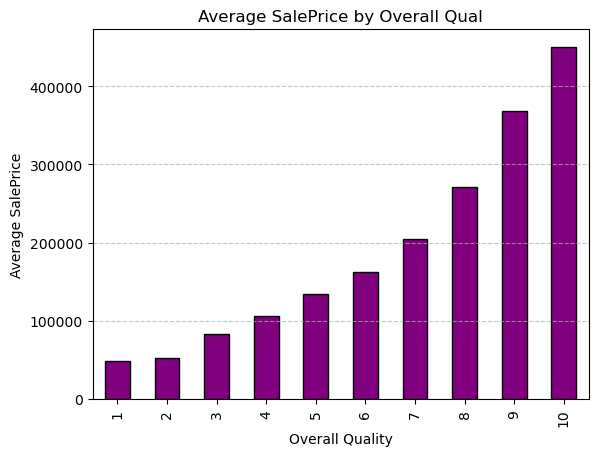

In [132]:
#e) Barplot: OverallQual vs Average SalePrice

# Compute average SalePrice for each OverallQual
avg_price = project.groupby('Overall Qual')['SalePrice'].mean()

# Create bar plot
avg_price.plot(kind='bar', color='purple', edgecolor='black')

plt.title('Average SalePrice by Overall Qual')
plt.xlabel('Overall Quality')
plt.ylabel('Average SalePrice')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # horizontal grid
plt.show()

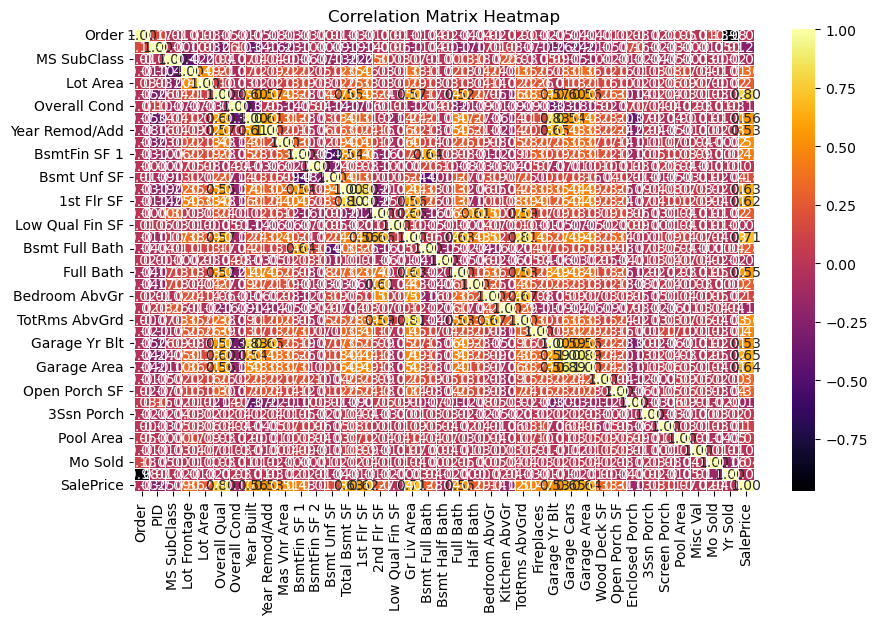

In [133]:
#f) Heatmap of correlations
plt.figure(figsize=(10, 6))
corr_matrix = project.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [134]:
# 2.	Answer:
# Which variable has strongest correlation with SalePrice? order, MS SubClass
#1 → perfect positive correlation (they move together),0 → no correlation,-1 → perfect negative correlation (one goes up, the other goes down)
# Are there visible outliers? YES theere a number of points far away from the main cluster.
# Is the relationship linear? 


#  PART 4: Correlation Analysis

In [170]:
!pip install scipy

In [171]:
# 1.Compute correlation matrix.

import pandas as pd
import numpy as np
from scipy.stats import pearsonr,spearmanr

project = pd.read_csv("AmesHousing.csv")  #displays the first 5 rows
project.head()

#a) i. pearson SalePrice vs Gr Liv Area
r, p_value = pearsonr(project["SalePrice"], project["Gr Liv Area"])
print(f"Pearson correlation coefficient:{r:.3f}")
print(f"p-value:{p_value:.3f}")
# As Gr Liv Area increases, SalePrice increases.statistically significant
# Larger above-ground living area is strongly associated with higher sale prices

Pearson correlation coefficient:0.707
p-value:0.000


In [172]:
#a) ii. pearson SalePrice vs Overall Qual

r, p_value = pearsonr(project["SalePrice"], project["Overall Qual"])
print(f"Pearson correlation coefficient:{r:.3f}")
print(f"p-value:{p_value:.3f}")

Pearson correlation coefficient:0.799
p-value:0.000


In [173]:
#a) iii. pearson SalePrice vs Garage Area

r, p_value = pearsonr(project["SalePrice"], project["Garage Area"])
print(f"Pearson correlation coefficient:{r:.3f}")
print(f"p-value:{p_value:.3f}")

Pearson correlation coefficient:nan
p-value:nan


In [174]:
#a) iv. pearson SalePrice vs Total Bsmt SF

r, p_value = pearsonr(project["SalePrice"], project["Total Bsmt SF"])
print(f"Pearson correlation coefficient:{r:.3f}")
print(f"p-value:{p_value:.3f}")

Pearson correlation coefficient:nan
p-value:nan


In [175]:
#a) v. pearson SalePrice vs Year Built

r, p_value = pearsonr(project["SalePrice"], project["Year Built"])
print(f"Pearson correlation coefficient:{r:.3f}")
print(f"p-value:{p_value:.3f}")

Pearson correlation coefficient:0.558
p-value:0.000


# Spearman corelation analysis

In [176]:
# Gr Liv Area vs SalePrice


spearman_corr, spearman_p = spearmanr(project['SalePrice'], project['Gr Liv Area'])
print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")

Spearman Correlation: 0.723, p-value: 0.000


In [177]:
# Overall Qual vs SalePrice
spearman_corr, spearman_p = spearmanr(project['SalePrice'], project['Overall Qual'])
print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")

Spearman Correlation: 0.809, p-value: 0.000


In [178]:
# Garage Area vs SalePrice

spearman_corr, spearman_p = spearmanr(project['SalePrice'], project['Garage Area'])
print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")

Spearman Correlation: nan, p-value: nan


In [179]:
# Total Bsmt SF vs SalePrice

spearman_corr, spearman_p = spearmanr(project['SalePrice'], project['Total Bsmt SF'])
print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")

Spearman Correlation: nan, p-value: nan


In [180]:
# Year Built vs SalePrice

spearman_corr, spearman_p = spearmanr(project['SalePrice'], project['Year Built'])
print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")

Spearman Correlation: 0.681, p-value: 0.000


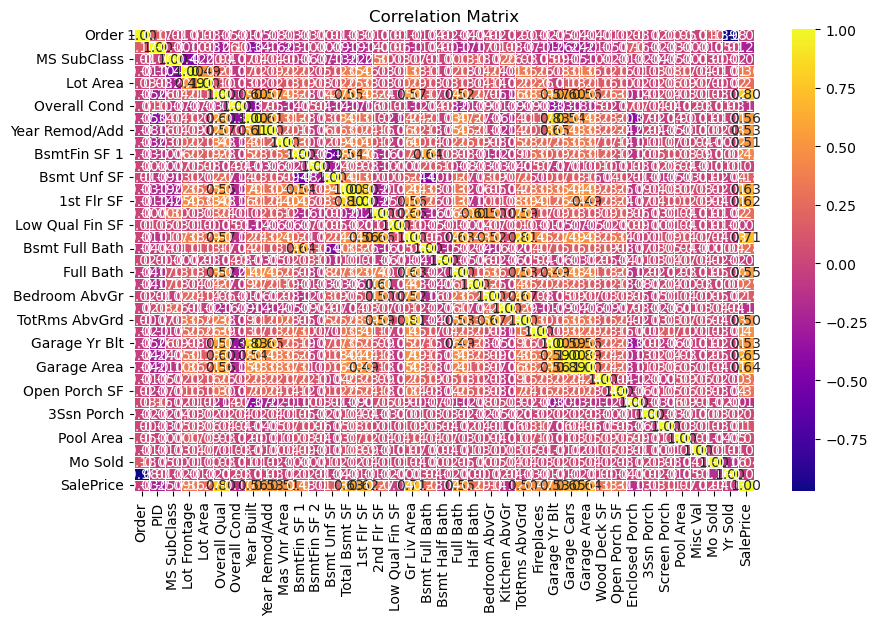

In [181]:
corr_matrix = project .select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# PART 5: Simple Linear Regression

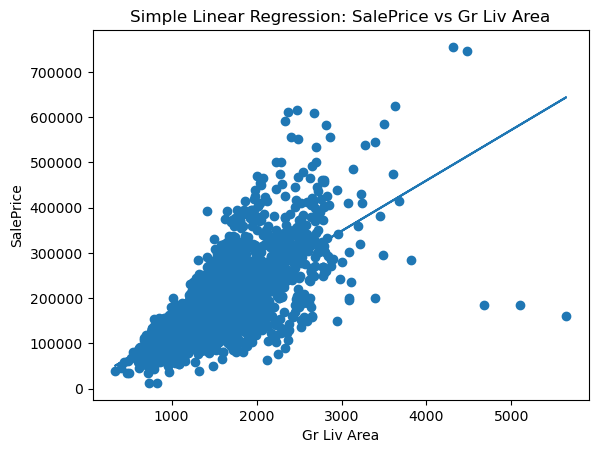

In [182]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Define variables
X = project["Gr Liv Area"]
y = project["SalePrice"]

# Add constant
X_const = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_const).fit()

# Create predictions
y_pred = model.predict(X_const)

# Plot scatterplot
plt.figure()
plt.scatter(X, y)

# Plot regression line
plt.plot(X, y_pred)

# Labels
plt.xlabel("Gr Liv Area")
plt.ylabel("SalePrice")
plt.title("Simple Linear Regression: SalePrice vs Gr Liv Area")

plt.show()

In [ ]:
# III Interpretation of Results
# a.Coefficient (Gr Liv Area = 119.6517) Meaning:For every 1 unit increase in Gr Liv Area,
# the SalePrice increases by approximately 119.65 units, on average.
# Interpretation of Relationship
# A positive coefficient implies a positive linear relationship: As living area increases → SalePrice increases


# b.my p-value is 0.000 (actually < 0.001) thus < 0.05, the predictor is statistically significant
# We reject the null hypothesis that the coefficient equals zero.
# Gr Liv Area is a statistically significant predictor of SalePrice,  relationship is not due to random chance.


#c.R-squared (uncentered) = 0.918
# R² = 0.918
#  Meaning:91.8% of the variation in SalePrice is explained by Gr Liv Area.
# That is very high.

# Interpretation of Strength:There is a very strong linear relationship between Gr Liv Area and SalePrice.

In [ ]:
# IV.	Plot regression line

sorted_index = np.argsort(X)
plt.figure()
plt.scatter(X, y)
plt.plot(X.iloc[sorted_index], y_pred.iloc[sorted_index])
plt.xlabel("Gr Liv Area")
plt.ylabel("SalePrice")
plt.show()

# PART 6: Multiple Linear Regression

## Predict SalePrice (dependent variable) using the following independent variables

In [137]:
# I.Fit multiple linear regression model

# Combine X and y to drop rows together
data_clean = pd.concat([X, y], axis=1).dropna()

# Separate back
X = data_clean[X.columns]
y = data_clean[y.name]

# Remove infinite values
X = X[~np.isinf(X).any(axis=1)]
y = y[~np.isinf(X).any(axis=1)]

# Now add constant and fit
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     2175.
Date:                Fri, 20 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:12:50   Log-Likelihood:                -34934.
No. Observations:                2928   AIC:                         6.988e+04
Df Residuals:                    2922   BIC:                         6.992e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -7.36e+05   5.62e+04    -13.105

In [139]:
# Add predicted values to the dataframe
project["PredictedPrice"] = model.predict(X)

print("R-squared:", model.rsquared)

R-squared: 0.7882427184425452


In [ ]:
# II.Interpret coefficients
# holding other predictors constant

# Gr Liv Area  coef =51.44 :Each additional sq ft of living area increases SalePrice by 51.44 units
# OverallQual coef=21,080: Each 1-unit increase in Overall Quality increases SalePrice by 21,080 units
# Garage Area coef=48.35:Each 1 sq ft increase in Garage Area increases SalePrice by 48.35 units
# Total Bsmt SF coef=30.67 :Each 1 sq ft increase in basement area increases SalePrice by 30.67 units
# Year Built coef=332.79 :Each additional year (newer house) increases SalePrice by 332.79 units

In [ ]:
# III.Compare R² with simple regression

Simple Regression (SalePrice ~ Gr Liv Area) → R² ≈ 0.707
Multiple Regression (all 5 predictors) → R² = 0.788

Adding OverallQual, GarageArea, TotalBsmtSF, and YearBuilt improved the model fit.
R² increased from 70.7% → 78.8% → model explains more variation in SalePrice.
This is expected: more meaningful predictors capture more variance.

IV. Other Observations

Durbin-Watson = 1.500
Slight positive autocorrelation of residuals (1.5 < 2).
High condition number = 2.28e+05
Indicates possible multicollinearity among predictors (some variables highly correlated).
Might want to check Variance Inflation Factor (VIF) later.
Residuals: Omnibus, Jarque-Bera tests → residuals are not perfectly normal, but common in housing data.

# Deliverables

In [ ]:
# Students should submit:
# 1.	Jupyter Notebook (.ipynb)
http://localhost:8888/notebooks/AMES_Project1_Kibidi.ipynb?

In [ ]:
# 2.	Clear comments explaining each step
done

In [ ]:
# 3.	Short written report (2–3 pages) answering: (U can have the report written just within the notebook as a markdown)